In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [137]:
df = pd.read_csv("/Users/luckybozi/Downloads/housing.csv")

In [139]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [141]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [145]:
# Calculate the average number of bedrooms
average_bedrooms = int(df['total_bedrooms'].mean())

average_bedrooms

537

In [147]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(average_bedrooms)

In [149]:
df['average_rooms'] = df['total_rooms']/df['households']

In [153]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
average_rooms         0
dtype: int64

In [86]:
# Calculate the average number of bedrooms per household
average_bedrooms_per_house = int(df['total_bedrooms'].sum() / df['households'].sum())

average_bedrooms_per_house

1

In [155]:
# Calculate the number of people per household
people_per_household = int(df['population'].sum() / df['households'].sum())

people_per_household


2

In [157]:
#plot population as scatter by x= longitude, y = latitude
#google long and lat for LA and SF and plt them as stars on that scatter
# LA = 34.0549° N, 118.2426° W
# SF = 37.7749° N, 122.4194° W

In [159]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'average_rooms'],
      dtype='object')

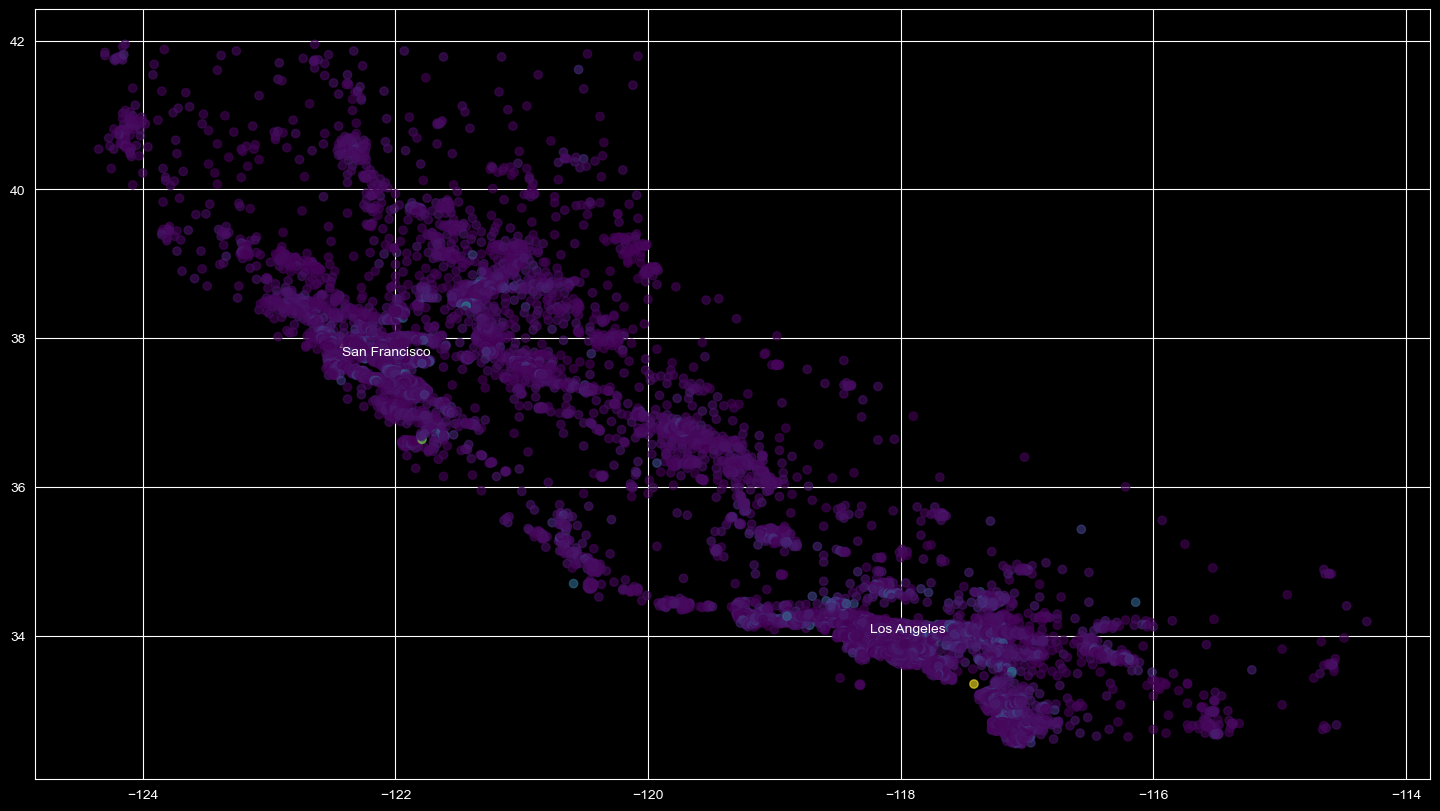

In [253]:
# Plot as a histogram median_house_value
plt.figure(figsize=(18,10))
y_axis = df['latitude']
x_axis = df['longitude']
color =df ['population']
plt.scatter(-118.2437, 34.0522, color='white', marker='*',s=800, label= "Los Angeles", edgecolors="black")
plt.scatter(-122.4194, 37.7749, color='white', marker='*',s=800,label= "San Francisco", edgecolors="black")
plt.scatter(x_axis,y_axis, c=color, cmap='viridis', alpha=0.6)
plt.annotate("Los Angeles", (-118.2437, 34.0522),color="white")
plt.annotate("San Francisco", (-122.4194, 37.7749),color="white");

In [163]:
#df.drop(df[df['median_house_value'] > 500000].index, inplace=True)
row_to_drop=df[df['median_house_value'] > 500000].index
df.drop(row_to_drop,axis=0, inplace = True)

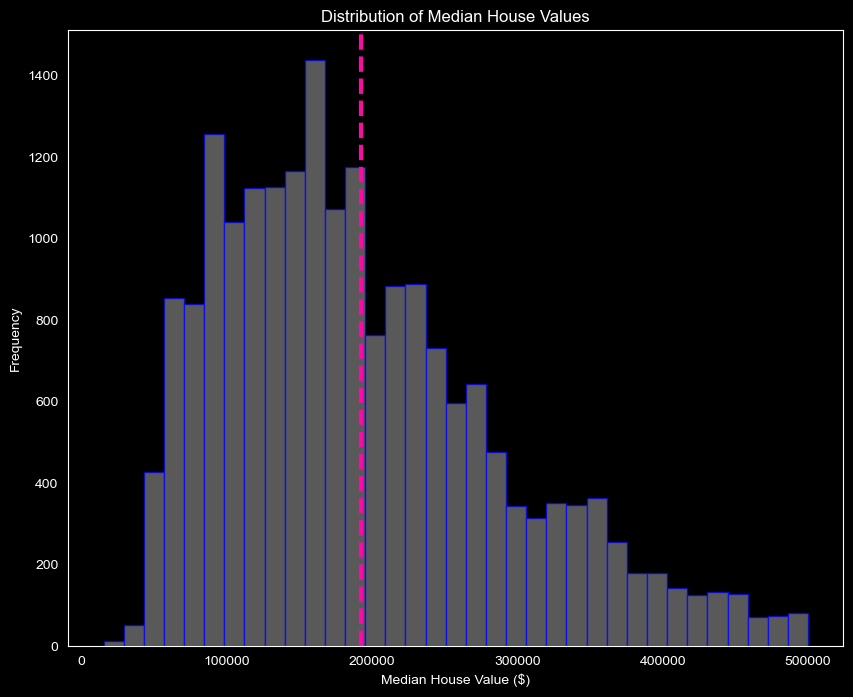

In [165]:
# Plot the histogram for 'median_house_value'
plt.figure(figsize=(10, 8))
plt.hist(df['median_house_value'], bins=35, color='grey', edgecolor='blue', alpha=0.7)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value ($)')
plt.ylabel('Frequency')
plt.grid()
plt.axvline(df['median_house_value'].mean(), color='#f90ba4', 
            linestyle='dashed',linewidth=3);


In [167]:
df.corr
# is there corr between price vs. income

<bound method DataFrame.corr of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

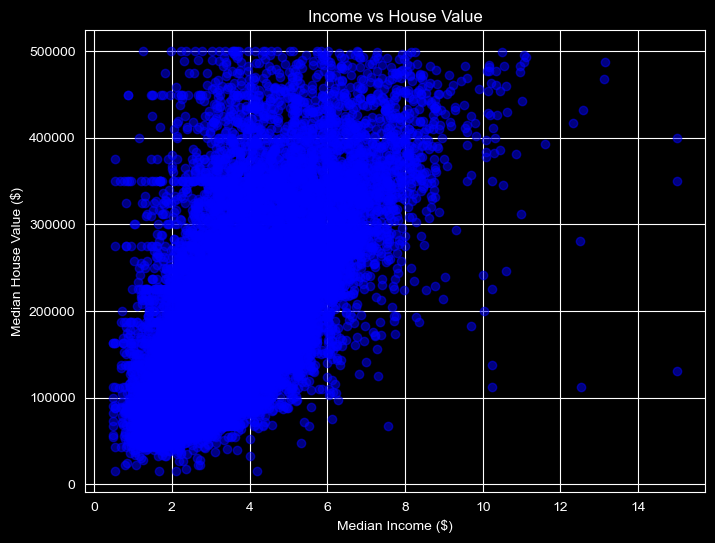

In [169]:
import matplotlib.pyplot as plt


# Scatter plot of median_income vs median_house_value
plt.figure(figsize=(8, 6))
plt.scatter(df['median_income'], df['median_house_value'], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Median Income ($)')
plt.ylabel('Median House Value ($)')
plt.title('Income vs House Value')


plt.show()


Text(0.5, 1.0, 'Median Price vs median_income')

<Figure size 1600x1000 with 0 Axes>

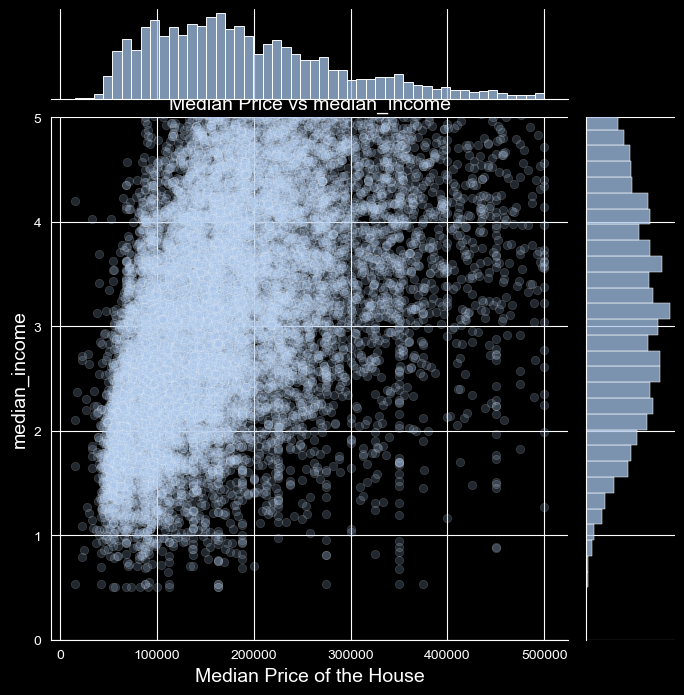

In [171]:
plt.figure(figsize=(16, 10))
plt.style.use('dark_background')
sns.jointplot(x=df['median_house_value'], y=df['median_income'], 
              height = 7, color = '#a7c5eb', joint_kws={'alpha': 0.2})
sns.set_style('darkgrid')
plt.ylim(0, 5)
plt.xlabel('Median Price of the House', fontsize = 14)
plt.ylabel('median_income', fontsize = 14)
plt.title('Median Price vs median_income', fontsize = 14)

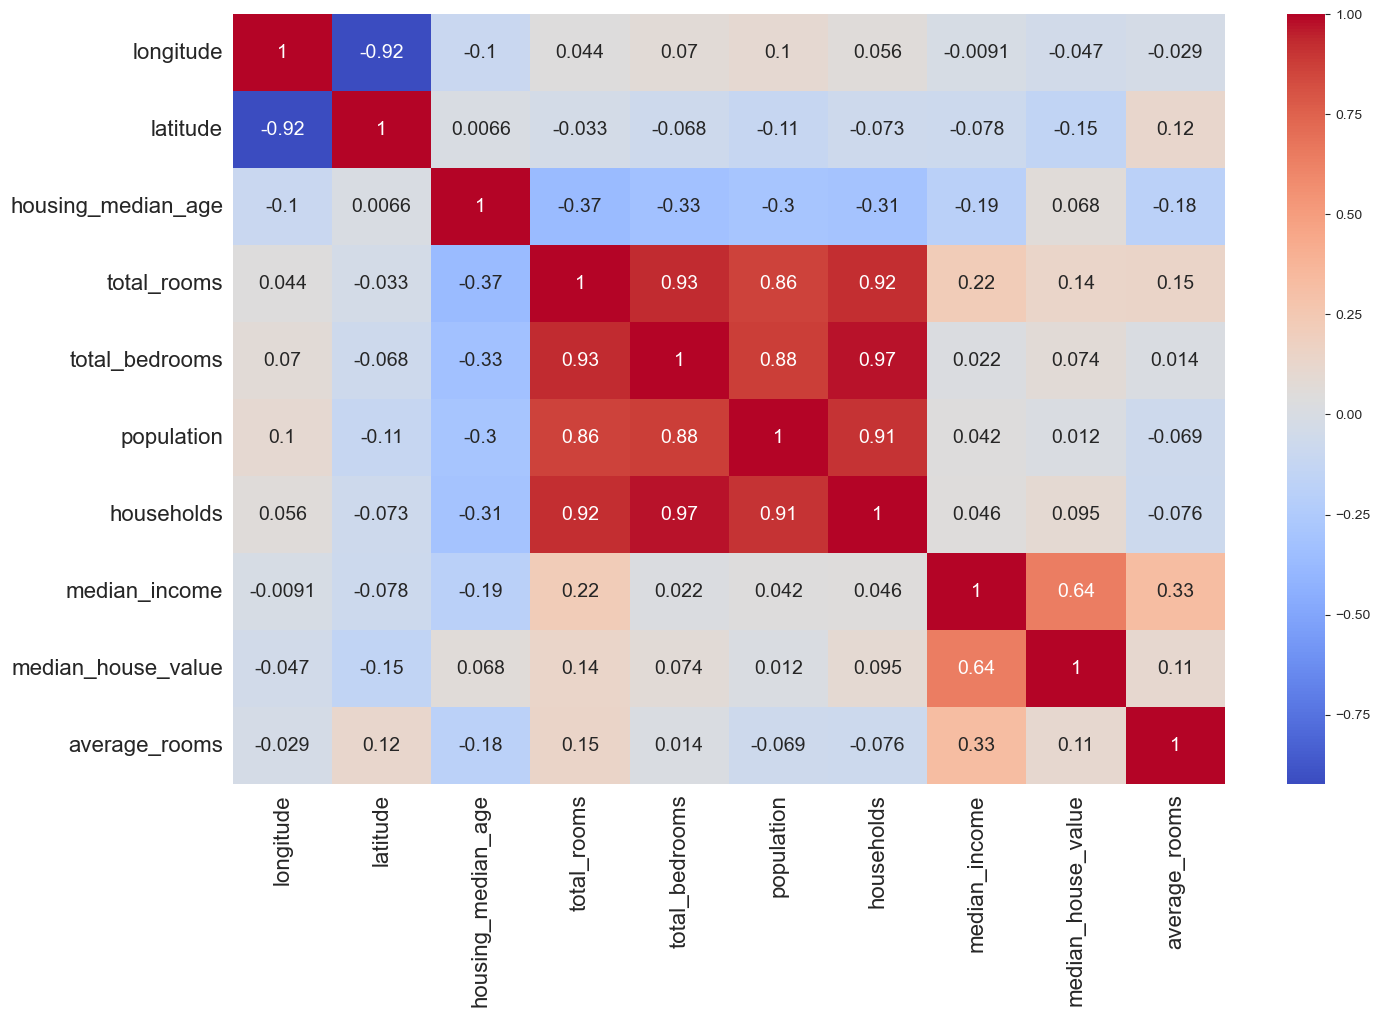

In [173]:
c = df.corr(numeric_only=True)
plt.figure(figsize=(16,10))
sns.heatmap(c, annot=True, annot_kws={"size": 14}, cmap="coolwarm")
plt.style.use('dark_background')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

Text(0.5, 1.0, 'number of households based on ocean_proximity')

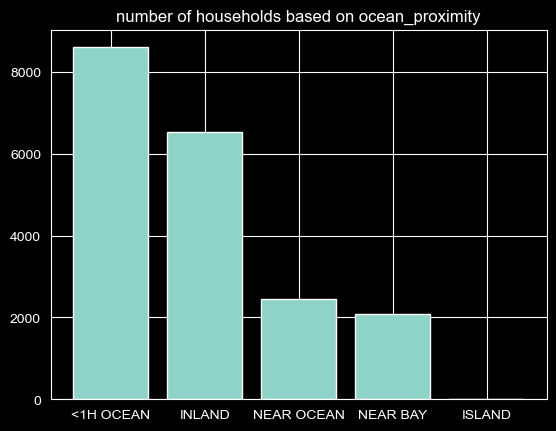

In [175]:
#plot as bar chart number of households based on ocean_proximity" 
# Group by 'ocean_proximity' and sum the 'households' column
#households_by_ocean = df.groupby('ocean_proximity')['households'].sum()

ocean_proximity = df["ocean_proximity"].value_counts()
x= ocean_proximity.index
height = ocean_proximity.values
plt.bar(x,height)
plt.title("number of households based on ocean_proximity")



In [197]:
print(X.dtypes)

ocean_proximity        object
median_income         float64
housing_median_age    float64
dtype: object


In [207]:
from sklearn.preprocessing import LabelEncoder

print("Before encoding:\n", df['ocean_proximity'].head())

# Step 2: Encode 'ocean_proximity' into numeric
label_encoder = LabelEncoder()
df['ocean_proximity_numeric'] = label_encoder.fit_transform(df['ocean_proximity'])

# Verify the conversion
print("After encoding:\n", df[['ocean_proximity', 'ocean_proximity_numeric']].head())


Before encoding:
 0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object
After encoding:
   ocean_proximity  ocean_proximity_numeric
0        NEAR BAY                        3
1        NEAR BAY                        3
2        NEAR BAY                        3
3        NEAR BAY                        3
4        NEAR BAY                        3


In [209]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'average_rooms',
       'ocean_proximity_numeric'],
      dtype='object')

In [245]:
# Correctly drop columns
X = df[['ocean_proximity_numeric', 'median_income','housing_median_age']]

# Define the dependent variable y (median_house_value)
y = df['median_house_value']


In [247]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = .2)

In [249]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [251]:
model.score(X_test,y_test)

0.426843361838651